In [46]:
import numpy as np
import pygame
from PIL import Image, ImageFilter
# from G import WIDTH, HEIGHT

def generate_cloud_texture(width, height, scale=10, blur_radius=2):
    low_res_width = width // scale
    low_res_height = height // scale
    noise = np.random.rand(low_res_height, low_res_width) * 255

    noise_image = Image.fromarray(noise.astype(np.uint8), mode='L')
    noise_image = noise_image.resize((width, height), Image.BILINEAR)
    return np.asarray(noise_image.convert('RGB'), dtype=np.float32) / 255

def generate_green_base(width = 600, height = 1000, scale = 2, blur_radius = 20, brightness = 0.7):
    msk = generate_cloud_texture(width, height, scale, blur_radius)
    green = np.zeros(msk.shape)
    green[:,:,0] = 0
    green[:,:,1] = brightness
    green[:,:,2] = brightness/2
    bk = green * msk
    return bk

def to_image(bk):
    return Image.fromarray((255 * bk).astype(np.uint8), mode='RGB')

In [100]:
from PIL import Image, ImageDraw
import random
import math

# Function to generate a star-like shape (flash)
def generate_flash_star(image_size, center, num_points, min_radius, max_radius, angle_var=0.01,
                        colour='yellow', r = 0):
    img = Image.new('RGBA', (image_size, image_size), (0, 0, 0, 0))  # Transparent background
    draw = ImageDraw.Draw(img)

    angle_step = 360 / num_points
    def get_points():
        points = []

        for i in range(num_points):
            # Calculate the angle for this point
            angle_deg = i * angle_step
            angle_rad = math.radians(angle_deg) + random.uniform(-angle_var, angle_var)

            # Alternate between randomizing the radius for inner and outer points
            if i % 2 == 0:
                radius = random.uniform(min_radius, max_radius)
            else:
                radius = random.uniform(min_radius // 2, min_radius)  # inner radius variation

            # Calculate the x, y coordinates of the point
            x = center[0] + radius * math.cos(angle_rad)
            y = center[1] + radius * math.sin(angle_rad)
            points.append((x, y))
        return points

    # Draw the star shape
    draw.polygon(get_points(), fill=colour, outline=colour)
    if r > 0:
        draw.ellipse((center[0]-r, center[1]-r, center[0]+r, center[1]+r), fill=(0,0,0,127))
    return img

def add_sparks(image, num_sparks):
    width, height = image.size
    pixels = image.load()
    center_x, center_y = width // 2, height // 2
    spread = min(width, height) // 4  # Controls the concentration range

    for _ in range(num_sparks):
        # Generate coordinates concentrated around the center
        x = int(random.gauss(center_x, spread / 2))
        y = int(random.gauss(center_y, spread / 2))

        # Ensure the coordinates are within the image bounds
        if 0 <= x < width and 0 <= y < height:
            pixels[x, y] = (255, 255, 0)  # Yellow color for spark (R, G, B)
    return image


# Parameters
image_size = 12  # Image size (400x400)
edge_c = (image_size//2, image_size//2)  # Center of the star
num_points = 24  # Number of points in the star
min_radius = 2  # Minimum distance from center
max_radius = 3  # Maximum distance from center
circle_radius = 1.5

# Generate and save the star image
colour = (40, 40, 40, 100)
flash_star = generate_flash_star(image_size, edge_c, num_points, min_radius, max_radius, 0.2,
                                 colour = colour, r = circle_radius)

display(flash_star)

In [102]:
flash_star.save("../assets/decals/burns/plasma_center0.png")  # Save as PNG

In [63]:
# Parameters
image_size = 18  # Image size (400x400)
edge_c = (image_size//2, image_size//2)  # Center of the star
num_points = 24  # Number of points in the star
min_radius = 4  # Minimum distance from center
max_radius = 5  # Maximum distance from center
circle_radius = 0

# Generate and save the star image
colour = (100, 100, 255, 200)
inner_star = generate_flash_star(image_size, edge_c, num_points, min_radius, max_radius, 0.2,
                                 colour = colour, r = circle_radius)

display(inner_star)

In [64]:
flash_star.paste(inner_star, (0,0), inner_star)
# flash_star = add_sparks(flash_star, 3)
display(flash_star)

In [82]:
# flash_star.save("/home/tao.zhang/git_personal/mnb_halo/assets/decals/explosion/bullet_impact/spark0.png")  # Save as PNG
flash_star.save("../assets/decals/explosion/micro_spark/spark3.png")  # Save as PNG

In [67]:
from PIL import Image, ImageDraw
import random

def create_gradient_circle(diameter, center_c, edge_c, edge_alph=255):
    # Create an empty image with a transparent background
    image = Image.new("RGBA", (diameter, diameter))
    draw = ImageDraw.Draw(image)
    a_decay = (255 - edge_alph) // (diameter // 2)
    alph = 255
    # Draw a radial gradient
    for i in range(diameter // 2, 0, -1):
        # Calculate the color for the current radius
        alpha = i / (diameter // 2)
        alph = 255 - i*a_decay
        color = (
            int(center_c[0] * alpha + edge_c[0] * (1 - alpha)),
            int(center_c[1] * alpha + edge_c[1] * (1 - alpha)),
            int(center_c[2] * alpha + edge_c[2] * (1 - alpha)),
            alph
        )
        # Draw a smaller circle with the calculated color
        draw.ellipse(
            (diameter // 2 - i, diameter // 2 - i, diameter // 2 + i, diameter // 2 + i),
            fill=color
        )

    return image

# Example usage
diameter = 18
center_color = (25, 25, 255)
edge_color = (100, 100, 255)
image = create_gradient_circle(diameter, center_color, edge_color, edge_alph=0)
display(image)

In [130]:
from PIL import Image, ImageDraw
import random

def generate_lighting_texture(width, height, glow_center, max_radius, center_color, edge_color):
    # Create a blank image with transparency
    image = Image.new("RGBA", (width, height), (0, 0, 0, 0))
    draw = ImageDraw.Draw(image)

    # Draw gradient circles to simulate a lighting texture
    for r in range(max_radius, 0, -1):
        # Calculate gradient color based on radius
        ratio = r / max_radius
        color = (
            int(edge_color[0] * ratio + center_color[0] * (1 - ratio)),
            int(edge_color[1] * ratio + center_color[1] * (1 - ratio)),
            int(edge_color[2] * ratio + center_color[2] * (1 - ratio)),
            int(255 * (1 - ratio))  # Transparency gradient
        )
        draw.ellipse(
            (glow_center[0] - r, glow_center[1] - r, glow_center[0] + r, glow_center[1] + r),
            fill=color
        )

    # Add random noise for more texture (optional)
    # for _ in range(300):
    #     x = random.randint(0, width - 1)
    #     y = random.randint(0, height - 1)
    #     intensity = random.randint(100, 200)
    #     image.putpixel((x, y), (intensity, intensity, intensity, random.randint(50, 150)))

    return image

# Parameters for texture
width, height = 20, 20
glow_center = (width // 2, height // 2)
max_radius = 10
center_color = (100, 200, 100)  # Soft yellowish center
edge_color = (50, 255, 50)       # Dark blue edge

# Generate and show lighting texture
texture = generate_lighting_texture(width, height, glow_center, max_radius, center_color, edge_color)
display(texture)

In [127]:
width, height = 20, 20
glow_center = (width // 2, height // 2)
max_radius = 5
center_color = (150, 255, 150)
edge_color = (50, 127, 50)

# Generate and show lighting texture
itexture = generate_lighting_texture(width, height, glow_center, max_radius, center_color, edge_color)
display(itexture)

In [128]:
image.paste(itexture, (0,0), itexture)
display(itexture)

In [129]:
image.save("../assets/decals/explosion/plasma_mark/green.png")  # Save as PNG

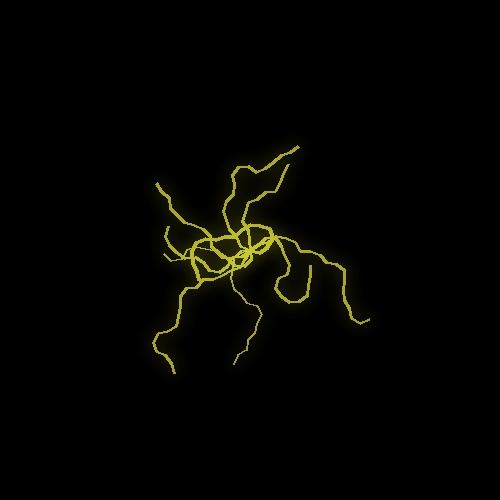

In [42]:
from PIL import Image, ImageDraw, ImageFilter
import random
import math

def generate_lightning_image(size=(500, 500), bolt_color=(255, 255, 255), bg_color=(0, 0, 0, 0)):
    # Create an empty image with a black background
    image = Image.new("RGB", size, bg_color)
    draw = ImageDraw.Draw(image)
    center_x, center_y = size[0] // 2, size[1] // 2

    # Generate multiple lightning branches
    for _ in range(10):  # Number of branches
        angle = random.uniform(0, 2 * math.pi)  # Random angle
        length = random.uniform(100, 200)  # Random length
        thickness = random.randint(2, 4)  # Random thickness

        # Starting point at the center
        x, y = center_x, center_y
        for _ in range(int(length // 10)):  # Break the line into segments
            angle += random.uniform(-1, 1)  # Add randomness to angle
            x_end = x + math.cos(angle) * 10
            y_end = y + math.sin(angle) * 10
            draw.line([(x, y), (x_end, y_end)], fill=bolt_color, width=thickness)
            x, y = x_end, y_end  # Update to the end of the segment

    # Apply a glow effect
    glow_image = image.filter(ImageFilter.GaussianBlur(8))
    image = Image.blend(glow_image, image, alpha=0.6)

    return image

bolt_colour = (255, 255, 50)
img = generate_lightning_image(bolt_color=bolt_colour)
display(img)